In [19]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [20]:
np.random.seed(1)

In [21]:
def rnorm(number_of_elements, mean=0, variance_squared=1):
    return math.sqrt(variance_squared) * np.random.randn(number_of_elements) + mean

## Exercise a) 
Using the rnorm() function, create a vector, x , containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.

In [22]:
x_list = rnorm(100)

## Exercise b)
Using the rnorm() function, create a vector, eps , containing 100
observations drawn from a N (0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.

In [23]:
epsilons = rnorm(100, 0, 0.25)

## Exercise c)
Using x and eps , generate a vector y according to the model
Y = −1 + 0.5X + .
(3.39)
What is the length of the vector y ? What are the values of β 0
and β 1 in this linear model?

In [24]:
y = -1 + 0.5 * x_list + epsilons

What is the length of the vector y?

100

What are the values of $\beta_0$ and $\beta_1$ in this linear model?

$-1$ and $0.5$

## Exercise d)

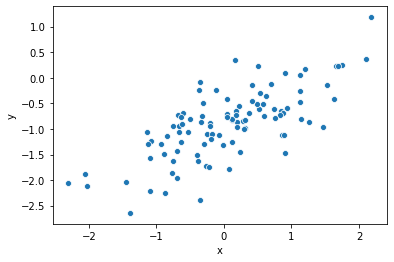

In [25]:
data = {'x': x_list, 'y': y}
df = pd.DataFrame(data)
ax = sns.scatterplot(x="x", y="y", data=df)

There is some positive correlation. Data is a little bit scattered, there is some noise due to $eps$.

In [26]:
df.corr()

,x,y
x,1.000000,0.722384
y,0.722384,1.000000


## Exercise e)

In [27]:
model = sm.OLS.from_formula('y ~ x', data)
results_x = model.fit()
results_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.20e-17
Time:                        20:05:40   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x              0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
results_x.pvalues

Intercept    6.982850e-36
x            2.196358e-17
dtype: float64

Coefficients (-0.92 and 0.54) are relatively close to the true ones (-1.0 and 0.5).

P-values are very close to 0 $\rightarrow$ we can reject null hypothesis.

$R^2$ of level 0.522 so it does not explain much of a data variance.

## Exercise f)

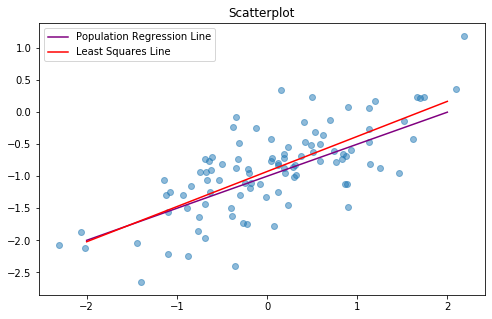

In [29]:
a = results_x.params['x']
b = results_x.params['Intercept']

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x_list, y, alpha=0.5)
x = np.linspace(-2.0, 2.0, 10)

ax.plot(x, eval("0.5 * x - 1"), color='purple', label='Population Regression Line')
ax.plot(x, eval("a * x + b"), color='red', label='Least Squares Line')

ax.set_title('Scatterplot')
plt.legend(loc=2)
plt.show()

## Exercise g)

In [30]:
model = sm.OLS.from_formula('y ~ x + I(x**2)', data)
results_x_squared = model.fit()
results_x_squared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.83e-16
Time:                        20:05:41   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x              0.5468      0.053     10.229      0.000       0.441       0.653
I(x ** 2)      0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print(f'R^2 of y ~ x: {results_x.rsquared }')
print(f'R^2 of y ~ x + x^2: {results_x_squared.rsquared }')

R^2 of y ~ x: 0.5218387119375147
R^2 of y ~ x + x^2: 0.5220007118611885


In [32]:
results_x_squared.pvalues

Intercept    2.915250e-29
x            4.299969e-17
I(x ** 2)    8.565000e-01
dtype: float64

There is a slight increase in the value of $R^2$, but p-value for $I(x^2)$ is > 5% - there is no relationship between y and $x^2$.

# Rerun pipeline

In [33]:
def visualise_plots(results, x, y):
    a = results.params['x']
    b = results.params['Intercept']

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(x, y, alpha=0.5)
    x_values = np.linspace(-3, 3, 10)

    ax.plot(x_values, eval("0.5 * x_values - 1"), color='purple', label='Population Regression Line')
    ax.plot(x_values, eval("a * x_values + b"), color='red', label='Least Squares Line')

    ax.set_title('Scatterplot')
    plt.legend(loc=2)
    plt.show()

In [34]:
def perform_pipeline(variance):

    x_list = rnorm(100)
    epsilons = rnorm(100, 0, variance)

    y = [-1 + (0.5 * x) + e for x, e in zip(x_list, epsilons)]
    data = {'x': x_list, 'y': y}
    
    model = sm.OLS.from_formula('y ~ x', data)
    results = model.fit()
    print(results.summary())
    
    a = results.params['x']
    b = results.params['Intercept']

    visualise_plots(results, x_list, y)
    print('\n' * 3)

    model = sm.OLS.from_formula('y ~ x + I(x**2)', data)
    results_squared = model.fit()
    results_squared.summary()
    return results, results_squared

## Ex h) Less noise

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     78.10
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           4.02e-14
Time:                        20:05:46   Log-Likelihood:                -78.683
No. Observations:                 100   AIC:                             161.4
Df Residuals:                      98   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0099      0.054    -18.810      0.0

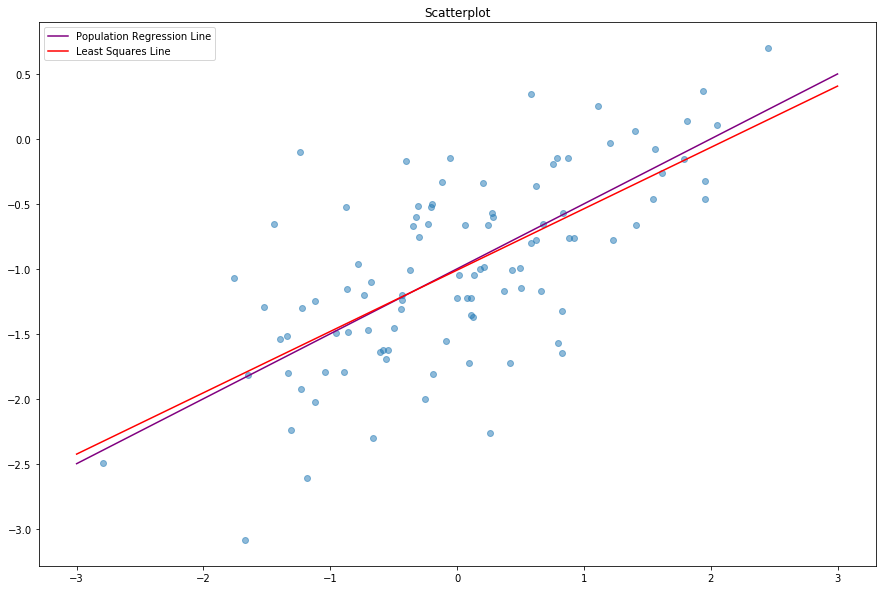

In [35]:
results_less_noise, results_less_noise_squared = perform_pipeline(0.25)

## Ex i) More noise

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.96
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           7.19e-08
Time:                        20:05:47   Log-Likelihood:                -145.66
No. Observations:                 100   AIC:                             295.3
Df Residuals:                      98   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8802      0.105     -8.375      0.0

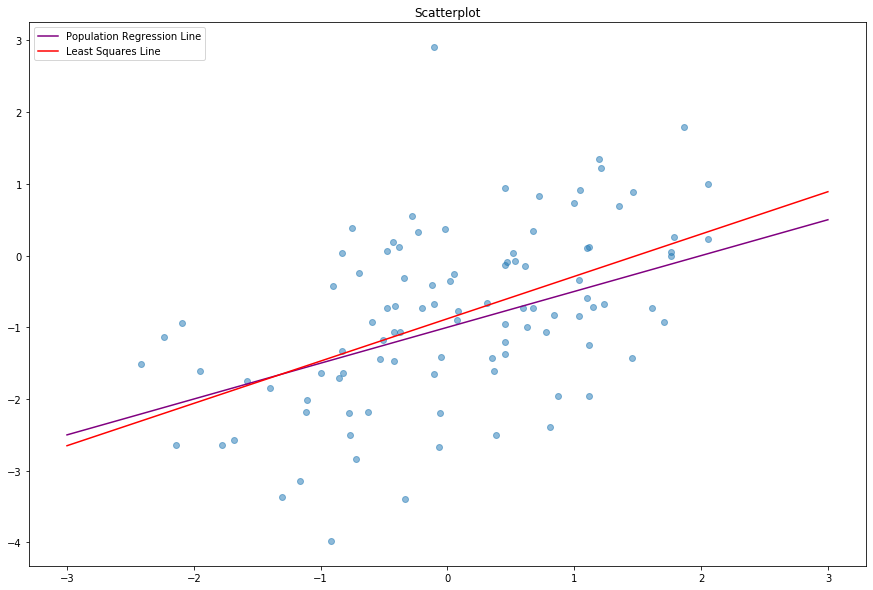

In [36]:
results_more_noise, results_more_noise_squared = perform_pipeline(1)

# Confidence intervals

$\mu \pm 1.96 \cdot \frac{SE}{\sqrt{n}}$ for CI of 99%

In [37]:
def get_confidence_intervals_size(dataframe, variable):
    ci = dataframe.loc[variable]
    return abs(ci[0] - ci[1])

## Initial dataset

In [38]:
ci_initial = results_x.conf_int()
ci_initial

,0,1
Intercept,-1.019741,-0.833246
x,0.442613,0.652814


In [39]:
# results_x_squared.conf_int()

## Less noise dataset

In [40]:
ci_less_noise = results_less_noise.conf_int()
ci_less_noise

,0,1
Intercept,-1.116451,-0.903364
x,0.366106,0.578137


In [41]:
# results_less_noise_squared.conf_int()

## More noise dataset

In [42]:
ci_more_noise = results_more_noise.conf_int()
ci_more_noise

,0,1
Intercept,-1.088787,-0.671654
x,0.389282,0.791316


In [43]:
# results_more_noise_squared.conf_int()

In [44]:
initial_ci_size = get_confidence_intervals_size(ci_initial, 'x')
less_noise_ci_size = get_confidence_intervals_size(ci_less_noise, 'x')
more_noise_ci_size = get_confidence_intervals_size(ci_more_noise, 'x')

In [45]:
print(initial_ci_size)
print(less_noise_ci_size)
print(more_noise_ci_size)

0.21020037995580304
0.21203093551758156
0.4020342966550585


All the intervals are oscillating around $0.5$, the narrowest interval is the second one - the one with less noise.